<a href="https://colab.research.google.com/github/Yohanes213/TensorFlow_Coursera/blob/main/Course1Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images , training_labels) , (test_images , test_labels) = fmnist.load_data()

training_images  = training_images / 255
test_images = test_images / 255

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128 , activation  = tf.nn.relu),
    tf.keras.layers.Dense(10 , activation = tf.nn.softmax)
])

In [4]:
model.compile(optimizer = 'adam' , loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images , training_labels , epochs = 5)

print("Evalution: ")
test_loss = model.evaluate(test_images , test_labels)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4979 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3728 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3353 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3104 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8906
Evalution: 
313/313 [==============================] - 1s 2ms/step - loss: 0.3682 - accuracy: 0.8695


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , input_shape = (28 , 28 , 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64 , (3 , 3) , activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128 , activation  = tf.nn.relu),
    tf.keras.layers.Dense(10 , activation = tf.nn.softmax)
])

model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [7]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


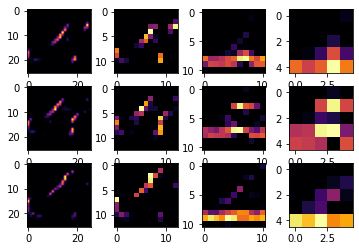

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)